<h1>MANIPULAÇÃO DE HISTOGRAMAS</h1>

<h2>Sumário</h2>
    
[1. Introdução](#introducao)<br>
[2. Script de rotulação simples](#script1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.1 Bibliotecas](#bibliotecas)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.2 Função de exibição do histograma](#funcao1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.3 Resultados](#result1)<br>
[3. Script de equalização de um histograma](#script2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.1 Resultados](#result2)<br>
[4. Script de detecção de movimento](#script3)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[4.1 Resultados](#result3)<br>

<a id='introducao'></a>

<h2>1. Introdução</h2>

<p style='text-align: justify;'>Este exercício tem com objetivo o entendimento acerca dos histogramas, como gerá-los, interpretá-los, modificá-los e o que pode ser observado em imagens a partir destes. O histograma consiste na frequência com que os pixels de uma determinada cor de repetem. No eixo x de um histograma de uma imagem, tem-se as cores de 0 a 255, e no eixo y tem-se a quantidade de ocorrências de cada uma dessas cores na imagem.</p>

<a id='script1'></a>

<h2>2. Script de exibição dos histogramas de uma imagem</h2>

<p style='text-align: justify;'>Esta seção descreve um código capaz de plotar o hitograma de imagens coloridas ou em escala de cinza. Para tal, é necessário utilizar certas bibliotecas, descritas na seção a seguir.</p>

<a id='bibliotecas'></a>

<h3>2.1 Bibliotecas</h3>

<p style='text-align: justify;'>Inicialmente, importa-se as bibliotecas necessárias para a realização dos algoritmos. A primeira consiste na biblioteca do openCV para Python, utilizada para todo o tratamento de imagem. O numpy é utilizado para trabalhar com as matrizes da simagens. O Matplotlib foi utilizado para a exibição das imagens <i>inline</i> no <i>Jupyter Notebook</i>.</p>

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<a id='funcao1'></a>

<h3>2.2 Função de exibição do histograma</h3>

A função abaixo recebe uma imagem por parâmetro que pode ser colorida ou em escala de cinza. A própria função irá verificar, pelas dimensões da matriz da imagem, se está está no formato RGB ou em escala de cinza. Se a imagem for colorida, são plotados três histogramas, um para cada componente de cor. Caso esteja em escala de cinza, apenas um histograma é exibido

In [65]:
def histogram(img,fignum):    
    if len(np.shape(img))==3:
        x_axis = np.arange(256)

        histImgR = np.histogram(img[:,:,0],256)[0]
        histImgG = np.histogram(img[:,:,1],256)[0]
        histImgB = np.histogram(img[:,:,2],256)[0]

        plt.figure(fignum,[15,15])
        plt.subplot(311)
        plt.bar(x_axis,histImgR, color = "red")
        plt.title("Histograma da matriz R")

        plt.subplot(312)
        plt.bar(x_axis,histImgG, color = "green")
        plt.title("Histograma da matriz G")

        plt.subplot(313)
        plt.bar(x_axis,histImgB, color = "blue")
        plt.title("Histograma da matriz B")
    else:
        x_axis = np.arange(256)

        hist = np.histogram(img,256)[0]

        plt.figure(1,[15,5])
        plt.bar(x_axis,hist)
        plt.title("Histograma da imagem")

<a id='result1'></a>

<h3>2.3 Resultados</h3>

<p style='text-align: justify;'>Para uma determinada foto utilizada, esta foi carregada em escala de cinza e integralmente colorida. Em seguidas, são exibidos todos os histogramas relacionados à imagem. </p>

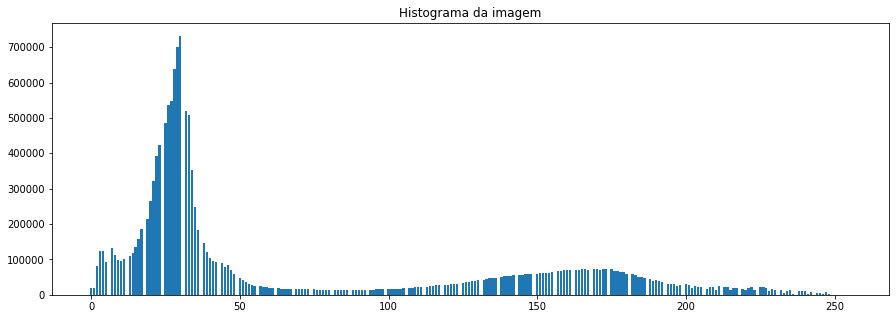

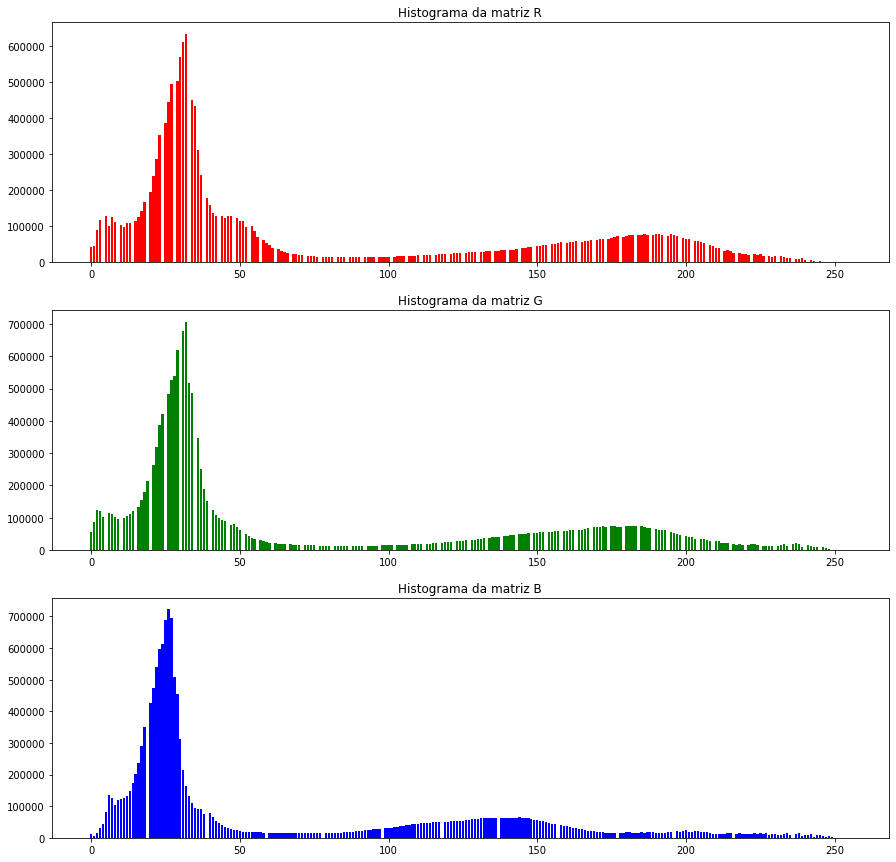

In [66]:
img = cv2.imread("..\\images\\me.jpg",0)
histogram(img,1)
img = cv2.imread("..\\images\\me.jpg")
histogram(img,2)

<a id='script2'></a>

<h2>3. Script de equalização de um histograma</h2>

<p style='text-align: justify;'>Esta seção descreve um código de realizar o processo de equalização do histograma de uma determinada imagem. Para isso, foi definida uma função simples chamada "histogram1" que retorna de forma direta o histograma de uma única matriz de uma imagem.</p>

<p style='text-align: justify;'>A função de equalização realiza o processo através da soma cumulativa do histograma e normalização dos valores do histograma, resultando em um histograma equalizado. Em seguida, são exibidos os dois histogramas para comparação e a função retorna a imagem após o processo de equalização.</p>

In [67]:
def histogram1(img):
    return np.histogram(img,256)[0]

def equalize(img): 
    L = 256
    npixels = np.shape(img)[0]*np.shape(img)[1]
    x_axis = np.arange(256)

    hist = histogram1(img)
        
    hist_a = np.cumsum(hist)
        
    imout = np.copy(img)
    imout = (L * hist_a[img] / np.max(hist_a)).astype(np.uint8)
    
    equa = np.zeros(len(hist))
    for i in range(len(hist)):
        equa[i] = L * hist_a[i]/npixels
    
    plt.figure(1,[15,5])
    plt.subplot(211)
    plt.bar(x_axis,hist)
    plt.title("Histograma original")
    
    plt.subplot(212)
    plt.bar(x_axis,histogram1(imout))
    plt.title("Histograma equalizado")
    
    return imout


<a id='result2'></a>

<h3>3.1 Resultados</h3>

<p style='text-align: justify;'>Para uma determinada foto utilizada, o trecho de código abaixo ilustra o processo de equalização do histograma. É notável que o histograma de baixo possui uma maior distribuição em relação ao de cima. As cores deixaram de ficar concentradas nos tons mais escuros.</p>

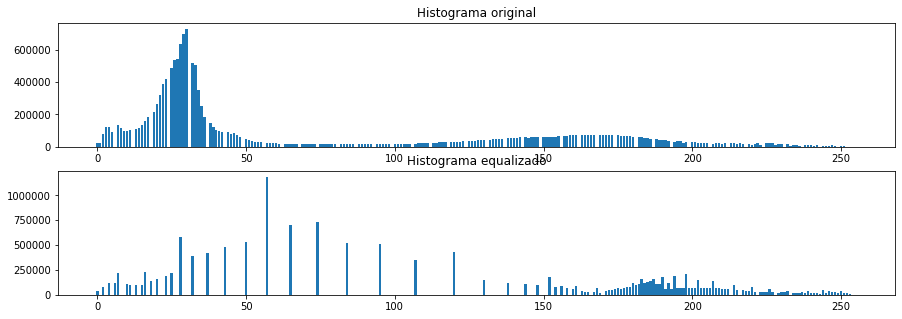

In [68]:
img = cv2.imread("..\\images\\me.jpg",0)
imout = equalize(img)

Observando as imagens abaixo, percebe-se de fato que houve um clareamento geral da imagem, correspondendo ao que foi comentado anteriormente sobre o histograma. Outro ponto notável do processo é o surgimento de falsos contornos, como por exemplo, o que surge no rosto.

(-0.5, 3879.5, 3879.5, -0.5)

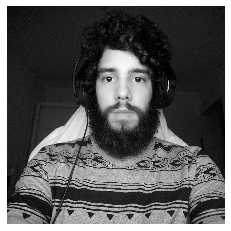

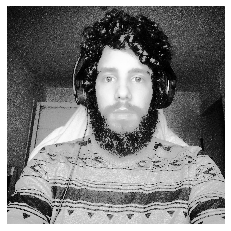

In [69]:
plt.figure(2)
plt.imshow(img,cmap="gray")
plt.axis("off")

plt.figure(3)
plt.imshow(imout,cmap="gray")
plt.axis("off")

<a id='script3'></a>

<h2>4. Script de detecção de movimento</h2>

<p style='text-align: justify;'>O script descrito a seguir utiliza histograma para poder realizar a detecção de movimento em uma imagem. A função abaixo recebe duas imagens diferentes, compara os histogramas de ambas através do cálculo do erro médio e através de um determinado valor, é considerado que houve movimentação na cena.</p>


In [95]:
def motion_detector(img1,img2):
    hist1 = histogram1(img1)
    hist2 = histogram1(img2)
    
    dif = np.abs(hist1-hist2)
    #print(np.mean(dif))
    if np.mean(dif) > 600:
        print("Houve movimento")
    return hist1, hist2

<a id='result3'></a>

<h3>4.1 Resultados</h3>

Abaixo, tem-se duas imagens diferentes, onde é utilizada a função de detecção de movimento. Esta consegue realizar sua função apropriadamente. Em seguida, são exibidas as imagens e os histogramas, onde é possível observar a diferença entre estes.

839.9296875
Houve movimento


Text(0.5, 1.0, 'Histograma 2')

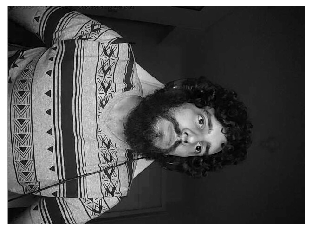

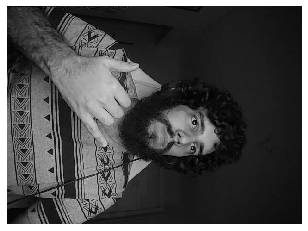

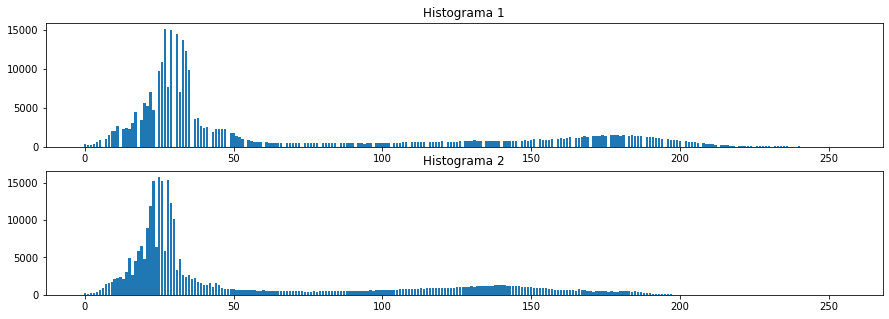

In [107]:
img1 = cv2.imread("..\\images\\motion1.jpg",0)
img2 = cv2.imread("..\\images\\motion2.jpg",0)

h1,h2 = motion_detector(img1,img2)

plt.figure(1)
plt.imshow(img1,cmap="gray")
plt.axis("off")

plt.figure(2)
plt.imshow(img2,cmap="gray")
plt.axis("off")

x_axis = np.arange(256)
plt.figure(3,[15,5])
plt.subplot(211)
plt.bar(x_axis,h1)
plt.title("Histograma 1")

plt.subplot(212)
plt.bar(x_axis,h2)
plt.title("Histograma 2")

O trecho de código executa a detecção de movimento através do vídeo capturado por uma webcam. A verificação de movimento é feita a cada 60 quadros de imagens lidos.

In [89]:
captura = cv2.VideoCapture(0)

cnt = 0


while(1):
    ret, frame = captura.read()
    
    if cnt == 0:
        img1 = frame[:,:,0]
    if cnt == 60:
        cnt = 0
        img2 = frame[:,:,0]
        motion_detector(img1,img2)
    cnt+=1
    
    cv2.imshow("Video", frame[:,:,0])
    #cv2.imshow("Video", frame[:,:,0])
   
    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
 
captura.release()
cv2.destroyAllWindows()

360.8671875
348.875
535.2109375
515.1171875
778.7890625
Houve movimento
629.09375
Houve movimento
658.4296875
Houve movimento
772.125
Houve movimento
827.9375
Houve movimento
816.21875
Houve movimento
843.0859375
Houve movimento
618.3046875
Houve movimento
610.015625
Houve movimento
412.1484375
553.328125
569.890625
582.2109375
576.0859375
569.1640625
759.9921875
Houve movimento
531.28125
637.875
Houve movimento
672.4296875
Houve movimento
735.4609375
Houve movimento
771.171875
Houve movimento
580.953125
767.7109375
Houve movimento
998.8359375
Houve movimento
1010.1328125
Houve movimento
1034.03125
Houve movimento
471.6328125
773.5546875
Houve movimento
804.5703125
Houve movimento
693.40625
Houve movimento
546.6953125
676.046875
Houve movimento
672.5625
Houve movimento
757.40625
Houve movimento
802.6640625
Houve movimento
729.1484375
Houve movimento
1025.8359375
Houve movimento
1062.40625
Houve movimento
932.859375
Houve movimento
682.1484375
Houve movimento
719.8203125
Houve movimento